<a href="https://colab.research.google.com/github/EskelinenElias/ADAML-project1/blob/main/ADAML_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instructions


In this week, you will be getting familiar with the data. At the end of the week, the goal is to have clean data, efficiently imported into your workspace, and visualized, and to understand what the data is used for. The PDF you will return will have max. 2 pages.

Breakdown of the points:

0.25p   
- an established communication channel and appropriate strategy for code sharing.

0.25p   
- data correctly imported into appropriate matrices completely: observations as rows, variables (predictors) as columns.

0.5p     
- identification of challenges of the data: for example: time series not synchronized, missing values in data, extra variables, variables with unknown physical meanings, etc.

0.5p     
- a visualization and comment on the dataset: variable distribution, number of observations, type of measurements (time series or not time series)

3p         
- exploratory data analysis with PCA: explain variable correlations and visualize the PCs using biplots, loading plots; (! only on the X matrix - we are not looking at the response variable now)

0.5p     
- identification of pretreatment steps, and a plan on how to do data pretreatment

## Loading the data

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot

path = "data.csv"
data = pd.read_csv(path)

### Fixing data formats

In [15]:
# Format date column
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')

# Format other columns
for column in data.columns[1:]:

    data[column] = data[column].str.replace(',', '.')
    data[column] = data[column].astype(float)

### Resampling the data

We resample the data by calculating the mean of the variables over a timestamp.

In [16]:
resampled_data = data.groupby("date").mean(numeric_only=True).reset_index()

## Exploring the data

In [ ]:
count_data = data.groupby("date").count()
print( "Minimum amount of observations per timestamp: ", count_data.iloc[:,0].min() )
print( "Maximum number of observations per timestamp: ", count_data.iloc[:,0].max() )

print( data.groupby("date").count() )

Minimum amount of observations per timestamp:  174
Maximum number of observations per timestamp:  180


In [ ]:
data_per_h = data['date'].value_counts()

diff_from_180 = data_per_h[data_per_h != 180]
print(diff_from_180)

date
2017-04-10 00:00:00    179
2017-03-10 01:00:00    174
Name: count, dtype: int64


## Visualizing the data

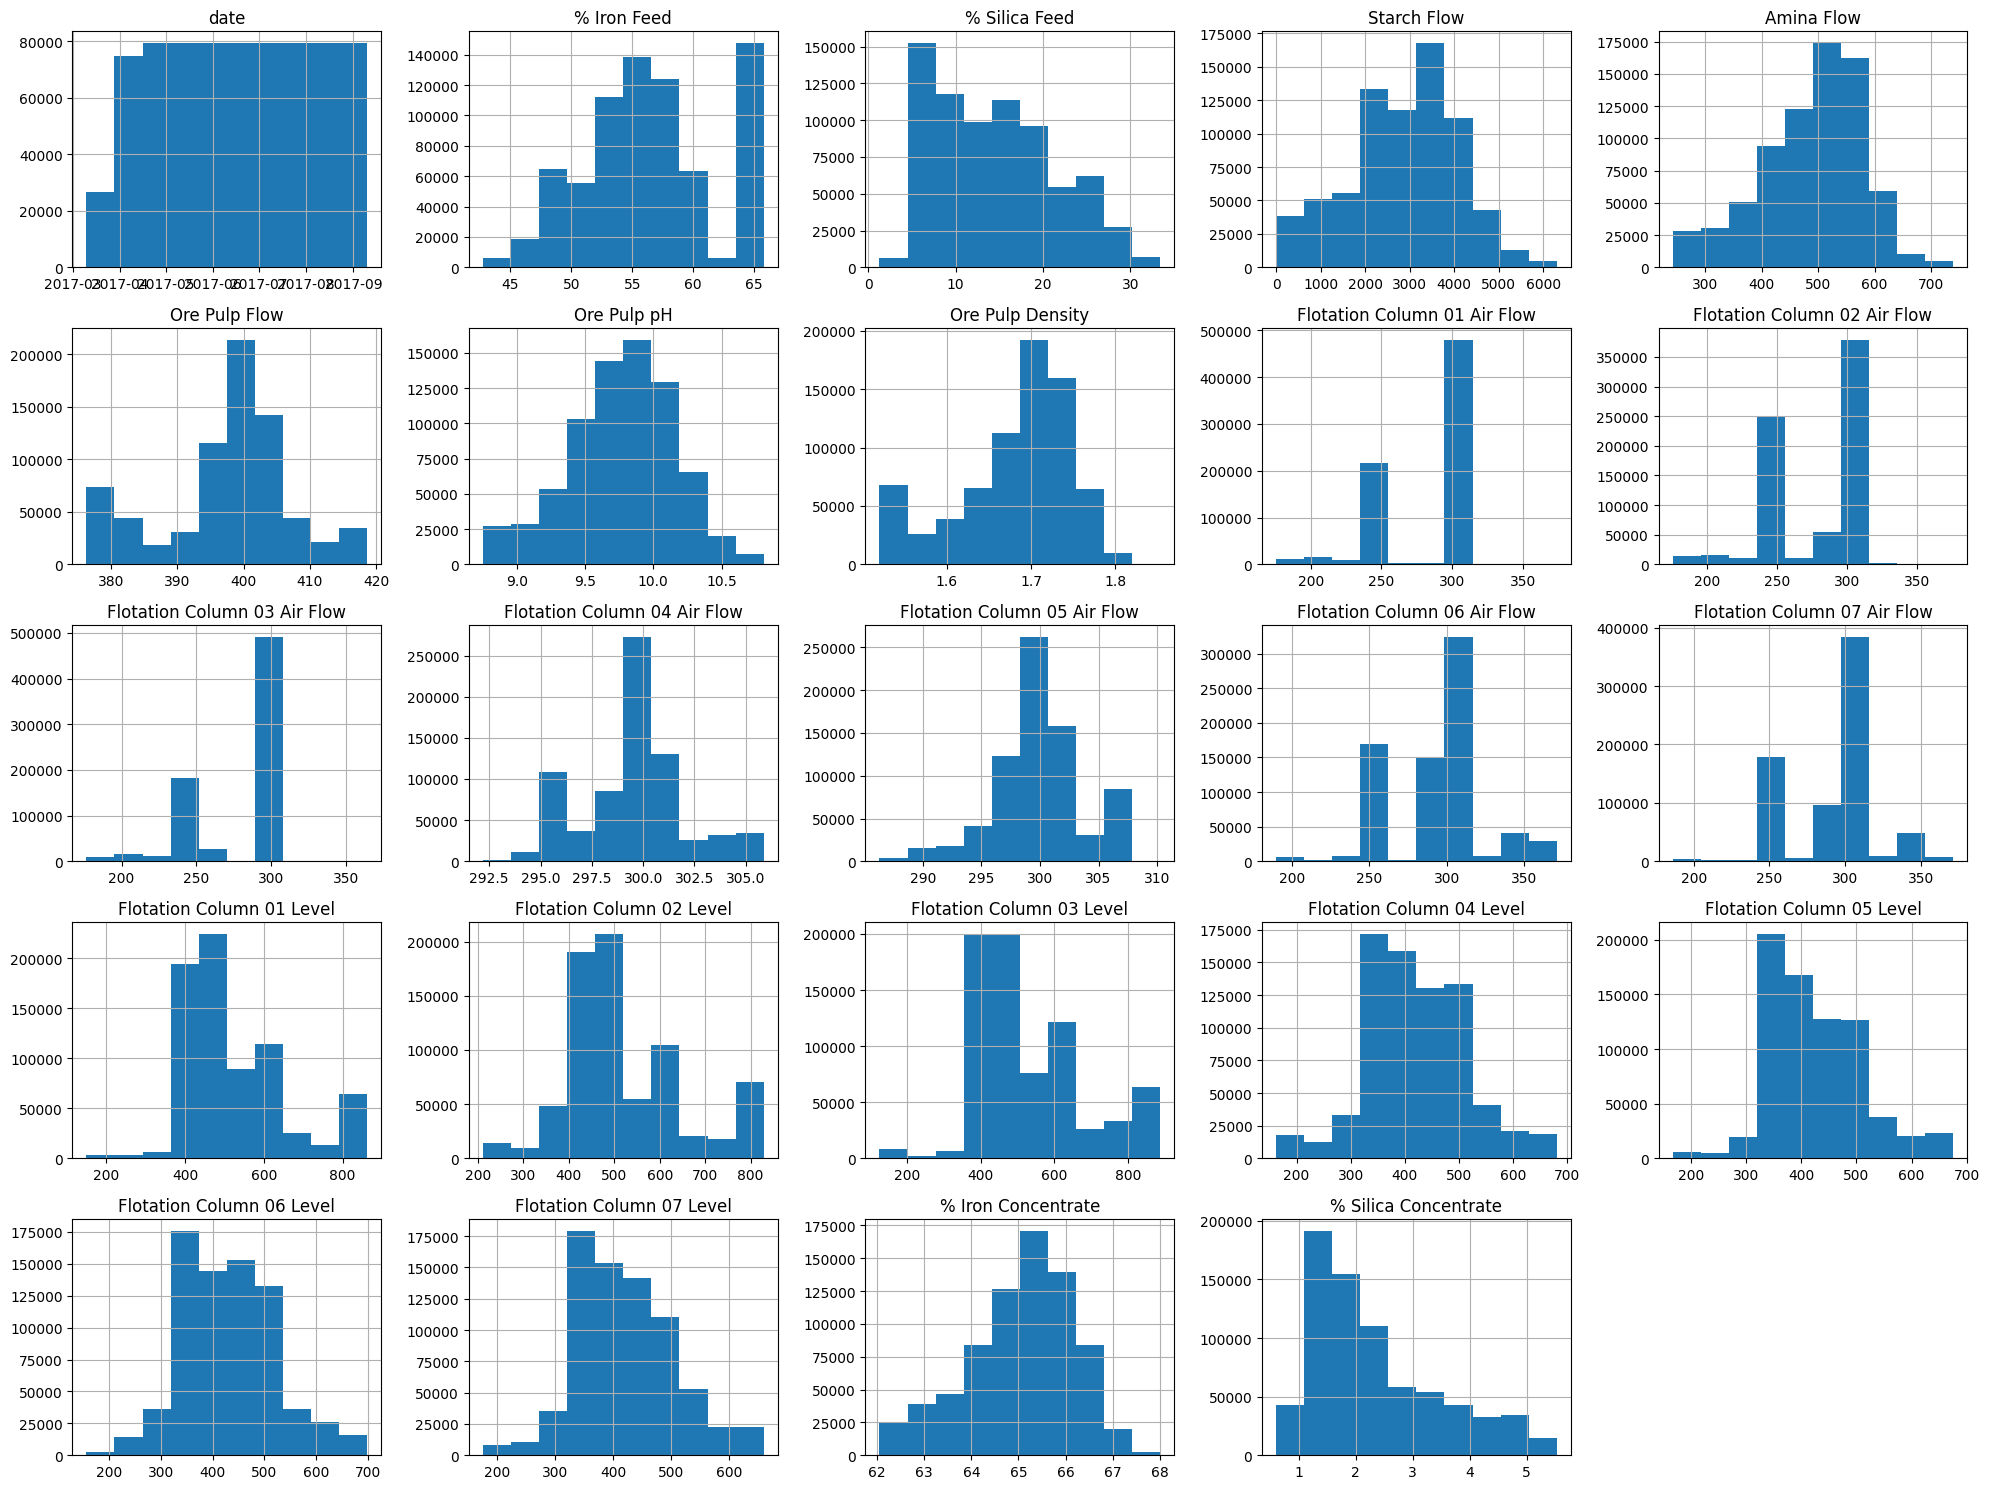

In [ ]:
data.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

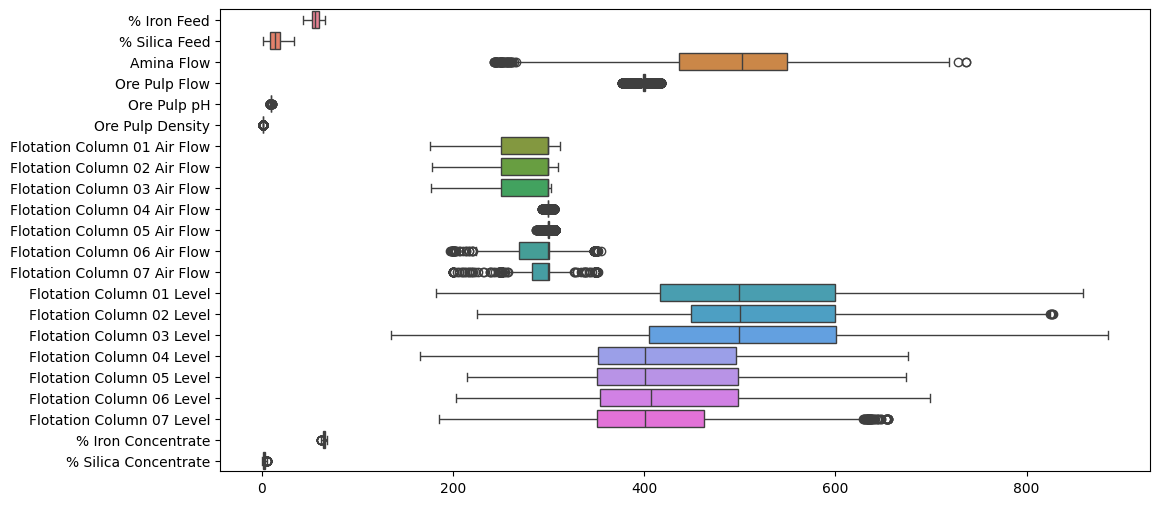

In [ ]:
import seaborn as sns

filtered_columns = data.columns[data.columns != "Starch Flow"]
resampled_filtered = resampled_data[filtered_columns]

plt.figure(figsize=(12, 6))
sns.boxplot(data=resampled_filtered, orient="h")

plt.show()

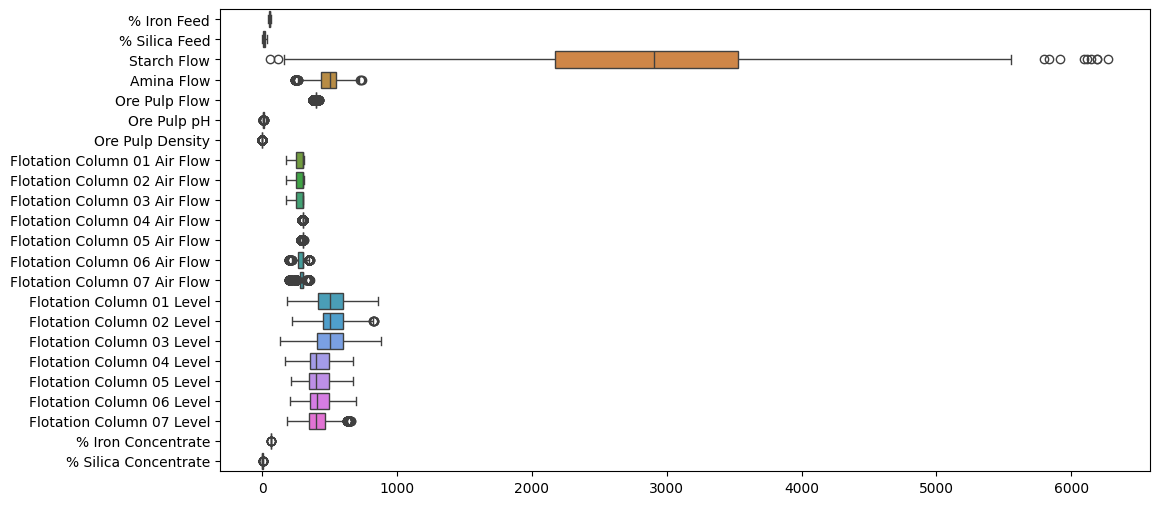

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=resampled_data, orient="h")

plt.show()

In [ ]:
# TESTI